In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.image import imread
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, plot_roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, balanced_accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
import pickle
pd.set_option("display.max_columns", 500)

In [3]:
df=pd.read_csv('cardio.csv',delimiter=';')

In [4]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [5]:
new_column_names = {
    'id':'Id',
    'age':'Age',
    'gender':'Gender',
    'height':'Height_cm',
    'weight':'Weight_kg',
    'ap_hi':'Ap_hi',
    'ap_lo':'Ap_lo',
    'cholesterol':'Cholesterol',
    'gluc':'Glucose',
    'smoke':'Smokers',
    'alco':'Alcohol',
    'active':'Active_exerciser',
    'cardio':'Cardio'
}

df = df.rename(columns=new_column_names)

In [6]:
df.isnull().sum()

Id                  0
Age                 0
Gender              0
Height_cm           0
Weight_kg           0
Ap_hi               0
Ap_lo               0
Cholesterol         0
Glucose             0
Smokers             0
Alcohol             0
Active_exerciser    0
Cardio              0
dtype: int64

In [7]:
df.dtypes

Id                    int64
Age                   int64
Gender                int64
Height_cm             int64
Weight_kg           float64
Ap_hi                 int64
Ap_lo                 int64
Cholesterol           int64
Glucose               int64
Smokers               int64
Alcohol               int64
Active_exerciser      int64
Cardio                int64
dtype: object

In [8]:
df.describe(include='all')

,Id,Age,Gender,Height_cm,Weight_kg,Ap_hi,Ap_lo,Cholesterol,Glucose,Smokers,Alcohol,Active_exerciser,Cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df['Cardio'].unique()

array([0, 1], dtype=int64)

In [10]:
for i in df.columns:
    if df[i].dtypes=="int64":
        print(f"{i} has {df[i].nunique()} Categories\n and they are\n{df[i].unique()}\n")
        

Id has 70000 Categories
 and they are
[    0     1     2 ... 99996 99998 99999]

Age has 8076 Categories
 and they are
[18393 20228 18857 ... 14925 17727 17926]

Gender has 2 Categories
 and they are
[2 1]

Height_cm has 109 Categories
 and they are
[168 156 165 169 151 157 178 158 164 173 181 172 170 154 162 163 153 159
 166 155 160 175 171 152 187 148 179 180 188 185 167 183 174 176 161 184
 177 182  76 149 142 150 144 147 186 146 141 195 140 198 145 143 196 138
 194 190 134 136 100 120 189 137 192 122 250 191 117  70  97 119 130 110
 193  75 132  71 135  67 125 139 133  74  98 112 207  68  55  81  80  64
  91  60 109  72 197  65 128 105 108 200 104 111 113  96 131  59  66  99
  57]

Ap_hi has 153 Categories
 and they are
[  110   140   130   150   100   120   145   170   135   125    90   180
   160   133   190    80   122   169   126   158   200    14   123    70
   161   147   115   137   153    11   148   105   220   119   141   165
   164    12   124   172   902   162   906   11

In [11]:
df['Weight_kg'].unique()

array([ 62.  ,  85.  ,  64.  ,  82.  ,  56.  ,  67.  ,  93.  ,  95.  ,
        71.  ,  68.  ,  80.  ,  60.  ,  78.  , 112.  ,  75.  ,  52.  ,
        83.  ,  69.  ,  90.  ,  45.  ,  65.  ,  59.  ,  66.  ,  74.  ,
       105.  ,  73.  ,  55.  ,  70.  ,  72.  ,  63.  ,  50.  , 107.  ,
        84.  ,  77.  ,  79.  ,  76.  ,  58.  , 115.  ,  97.  ,  53.  ,
        57.  ,  49.  , 110.  ,  94.  ,  92.  ,  87.  , 103.  ,  88.  ,
        99.  , 100.  ,  61.  ,  48.  ,  54.  ,  51.  ,  47.  ,  91.  ,
       104.  ,  81.  ,  98.  , 108.  ,  89.  , 101.  ,  86.  ,  65.5 ,
       142.  ,  96.  ,  44.  ,  41.  , 169.  , 116.  , 200.  ,  64.8 ,
       120.  , 117.  , 125.  , 106.  , 114.  , 113.  , 129.  , 124.  ,
        42.  , 123.  , 111.  , 102.  , 109.  ,  46.  , 139.  , 150.  ,
       138.  , 131.  ,  43.  ,  83.6 , 134.  , 106.5 , 121.  ,  40.  ,
       141.  , 119.  , 126.  , 177.  , 165.  , 122.  ,  62.3 , 118.  ,
        89.5 , 132.  , 155.  , 130.  , 159.  ,  84.6 , 140.  ,  82.3 ,
      

## Splitting data to train and test before preprocesing(IMPUTATIION)

In [12]:
train,test=train_test_split(df,test_size=0.2, random_state=123)

In [13]:
train.head(10)

,Id,Age,Gender,Height_cm,Weight_kg,Ap_hi,Ap_lo,Cholesterol,Glucose,Smokers,Alcohol,Active_exerciser,Cardio
48664,69494,18848,1,164,91.0,160,100,1,1,0,0,1,1
37360,53355,21735,2,165,87.0,140,90,3,3,0,0,0,0
37226,53180,15464,1,154,62.0,100,60,1,1,0,0,1,0
68726,98187,19124,2,176,90.0,130,90,2,1,0,0,1,1
12606,17993,22115,1,162,63.0,120,80,1,1,0,0,1,1
9362,13347,14350,2,170,86.0,130,80,2,1,0,0,1,0
39136,55885,19669,1,156,88.0,120,70,1,1,0,0,0,1
49592,70807,21675,1,165,78.0,130,90,2,1,0,0,1,0
42369,60528,19064,2,190,114.0,140,90,3,1,1,1,1,1
26180,37388,23322,1,150,85.0,150,90,1,1,0,0,1,1


In [14]:
train.shape

(56000, 13)

In [15]:
test.shape

(14000, 13)

## Action 1
## Reseting the index after splitting(because the indexing after splitting would have disorganized)

In [16]:
train.reset_index(drop=True, inplace=True)

In [17]:
train.head(10)

,Id,Age,Gender,Height_cm,Weight_kg,Ap_hi,Ap_lo,Cholesterol,Glucose,Smokers,Alcohol,Active_exerciser,Cardio
0,69494,18848,1,164,91.0,160,100,1,1,0,0,1,1
1,53355,21735,2,165,87.0,140,90,3,3,0,0,0,0
2,53180,15464,1,154,62.0,100,60,1,1,0,0,1,0
3,98187,19124,2,176,90.0,130,90,2,1,0,0,1,1
4,17993,22115,1,162,63.0,120,80,1,1,0,0,1,1
5,13347,14350,2,170,86.0,130,80,2,1,0,0,1,0
6,55885,19669,1,156,88.0,120,70,1,1,0,0,0,1
7,70807,21675,1,165,78.0,130,90,2,1,0,0,1,0
8,60528,19064,2,190,114.0,140,90,3,1,1,1,1,1
9,37388,23322,1,150,85.0,150,90,1,1,0,0,1,1


In [18]:
train.head(10)

,Id,Age,Gender,Height_cm,Weight_kg,Ap_hi,Ap_lo,Cholesterol,Glucose,Smokers,Alcohol,Active_exerciser,Cardio
0,69494,18848,1,164,91.0,160,100,1,1,0,0,1,1
1,53355,21735,2,165,87.0,140,90,3,3,0,0,0,0
2,53180,15464,1,154,62.0,100,60,1,1,0,0,1,0
3,98187,19124,2,176,90.0,130,90,2,1,0,0,1,1
4,17993,22115,1,162,63.0,120,80,1,1,0,0,1,1
5,13347,14350,2,170,86.0,130,80,2,1,0,0,1,0
6,55885,19669,1,156,88.0,120,70,1,1,0,0,0,1
7,70807,21675,1,165,78.0,130,90,2,1,0,0,1,0
8,60528,19064,2,190,114.0,140,90,3,1,1,1,1,1
9,37388,23322,1,150,85.0,150,90,1,1,0,0,1,1


In [19]:
## Function to Check my missing values and duplicates
def check_dataset(train):
    missing_value=train.isnull().sum()
    print('missing_value:')
    print(missing_value)
    
    duplicated_rows= train.duplicated().sum()
    print('\nduplicated_rows:')
    print(duplicated_rows)

In [20]:
check_dataset(train)

missing_value:
Id                  0
Age                 0
Gender              0
Height_cm           0
Weight_kg           0
Ap_hi               0
Ap_lo               0
Cholesterol         0
Glucose             0
Smokers             0
Alcohol             0
Active_exerciser    0
Cardio              0
dtype: int64

duplicated_rows:
0


In [21]:
## checking for the unique values to see what it looks like before correcting the irregularities
train['Ap_hi'].unique()

array([  160,   140,   100,   130,   120,   150,   110,   170,   115,
          90,   141,   108,   145,   148,   180,    14,    12,    80,
         210,   155,    99,   220,   154,   133,   153,   127,   125,
         135,   126,   200,   175,   190,   114,   163,   106,   118,
         123,    11,   105,   113,   103,   240,   185,    15,   134,
         137,   128,   156,   178,   162,   116,   117,    95,   139,
          97,   144,   179,   119,   121,  1400,    13,   142,   906,
         165,   167,    70,   149,   143,    85,   158,   152,   122,
         136,   112,   131,   109,   107,   147,    10,  1420,   138,
         151,   101,   164,   196,   215,   701,    96,   176,   102,
          17,   104,   172, 11500,   132,   111,   159,   124,   157,
         199,   166,   146,   169,   168,  1130,   171,   129,     1,
        1500,  -150,   174,   907,   195,   197,    20,   177,  1300,
         161, 16020,   193,  -120,   173,     7,  2000,  1620, 14020,
        -140,   184,

## Action 2
## putting the Blood pressure systolic to range in accordance to research of the SYSTOLIC minimum and maximum possible thresholds (90 and 145)

In [22]:
train.loc[train['Ap_hi'] < 90,'Ap_hi'] = 90
train.loc[train['Ap_hi'] > 145,'Ap_hi'] = 145

In [23]:
train['Ap_hi'].unique()

array([145, 140, 100, 130, 120, 110, 115,  90, 141, 108,  99, 133, 127,
       125, 135, 126, 114, 106, 118, 123, 105, 113, 103, 134, 137, 128,
       116, 117,  95, 139,  97, 144, 119, 121, 142, 143, 122, 136, 112,
       131, 109, 107, 138, 101,  96, 102, 104, 132, 111, 124, 129,  93],
      dtype=int64)

In [24]:
train['Ap_lo'].unique()

array([  100,    90,    60,    80,    70,    95,  1000,    75,    73,
          89,   120,   602,  1100,   110,    82,    79,    85,    65,
          69,    98,    71,   820,   140,    58,   115,    96,    72,
           0,   107,  1120,    84,    59,    83,    87,    62,   105,
         130,    81,    61,    50,    91,   109,    77,    86,    94,
         180,    66,    57,   113,    74,  9011,    40,    88,    99,
        1011,  1200,    76,    92,    93,    20,    68,    67,    52,
          78,    64,   160,   809,    55,     8,   900,   101,  1900,
        8099,    97,  8000,   182,   170,  1211,    63,    30,   902,
        1001,  1110,   108,  1044,  9100,   102,   870,   126,   709,
        1007,    10,   114,   119,  1177,   190,   -70,   104,   880,
        2088,  8200,  1003,     6,  7100,     7,  8079,   585, 10000,
        8044,    53,   150,    49,   106,   801,  8077,   103,  1033,
        8100, 11000,    45,    56,   710,  5700,  8500,  9800,   112,
         125,  1139,

## Action 3
## putting the Blood pressure DIASTOLIC to range in accordance to research of the systolic minimum and maximum possible thresholds (60 and 120) which can make you dizzy if below 60 or  have breathing issues if above 

In [25]:
train.loc[train['Ap_lo'] < 60, 'Ap_lo'] =60
train.loc[train['Ap_lo'] > 120,'Ap_lo'] =120

In [26]:
train['Ap_lo'].unique()

array([100,  90,  60,  80,  70,  95, 120,  75,  73,  89, 110,  82,  79,
        85,  65,  69,  98,  71, 115,  96,  72, 107,  84,  83,  87,  62,
       105,  81,  61,  91, 109,  77,  86,  94,  66, 113,  74,  88,  99,
        76,  92,  93,  68,  67,  78,  64, 101,  97,  63, 108, 102, 114,
       119, 104, 106, 103, 112, 118], dtype=int64)

In [27]:
train.head(100)

,Id,Age,Gender,Height_cm,Weight_kg,Ap_hi,Ap_lo,Cholesterol,Glucose,Smokers,Alcohol,Active_exerciser,Cardio
0,69494,18848,1,164,91.0,145,100,1,1,0,0,1,1
1,53355,21735,2,165,87.0,140,90,3,3,0,0,0,0
2,53180,15464,1,154,62.0,100,60,1,1,0,0,1,0
3,98187,19124,2,176,90.0,130,90,2,1,0,0,1,1
4,17993,22115,1,162,63.0,120,80,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36726,20604,2,167,70.0,120,70,3,3,0,0,1,0
96,36005,14331,2,170,68.0,120,80,1,3,1,0,1,0
97,66423,15215,2,178,92.0,90,100,1,1,1,0,1,0
98,76644,20937,1,158,68.0,130,80,2,1,0,0,1,1


In [28]:
check_dataset(train)

missing_value:
Id                  0
Age                 0
Gender              0
Height_cm           0
Weight_kg           0
Ap_hi               0
Ap_lo               0
Cholesterol         0
Glucose             0
Smokers             0
Alcohol             0
Active_exerciser    0
Cardio              0
dtype: int64

duplicated_rows:
0


## Feature Engineering Processes 

## Action  

In [29]:
train['Age_in_years']=(train['Age']/365).round().astype(int)

In [30]:
train.head(10)

,Id,Age,Gender,Height_cm,Weight_kg,Ap_hi,Ap_lo,Cholesterol,Glucose,Smokers,Alcohol,Active_exerciser,Cardio,Age_in_years
0,69494,18848,1,164,91.0,145,100,1,1,0,0,1,1,52
1,53355,21735,2,165,87.0,140,90,3,3,0,0,0,0,60
2,53180,15464,1,154,62.0,100,60,1,1,0,0,1,0,42
3,98187,19124,2,176,90.0,130,90,2,1,0,0,1,1,52
4,17993,22115,1,162,63.0,120,80,1,1,0,0,1,1,61
5,13347,14350,2,170,86.0,130,80,2,1,0,0,1,0,39
6,55885,19669,1,156,88.0,120,70,1,1,0,0,0,1,54
7,70807,21675,1,165,78.0,130,90,2,1,0,0,1,0,59
8,60528,19064,2,190,114.0,140,90,3,1,1,1,1,1,52
9,37388,23322,1,150,85.0,145,90,1,1,0,0,1,1,64


## Action 

In [31]:
def cal_bmi(Height_cm,Weight_kg):
    Height_m=Height_cm/100
    bmi=Weight_kg/(Height_m**2)
    return round(bmi,2)

In [32]:
train["Bmi"]=cal_bmi(train['Height_cm'], train['Weight_kg'])
train.head(10)

,Id,Age,Gender,Height_cm,Weight_kg,Ap_hi,Ap_lo,Cholesterol,Glucose,Smokers,Alcohol,Active_exerciser,Cardio,Age_in_years,Bmi
0,69494,18848,1,164,91.0,145,100,1,1,0,0,1,1,52,33.83
1,53355,21735,2,165,87.0,140,90,3,3,0,0,0,0,60,31.96
2,53180,15464,1,154,62.0,100,60,1,1,0,0,1,0,42,26.14
3,98187,19124,2,176,90.0,130,90,2,1,0,0,1,1,52,29.05
4,17993,22115,1,162,63.0,120,80,1,1,0,0,1,1,61,24.01
5,13347,14350,2,170,86.0,130,80,2,1,0,0,1,0,39,29.76
6,55885,19669,1,156,88.0,120,70,1,1,0,0,0,1,54,36.16
7,70807,21675,1,165,78.0,130,90,2,1,0,0,1,0,59,28.65
8,60528,19064,2,190,114.0,140,90,3,1,1,1,1,1,52,31.58
9,37388,23322,1,150,85.0,145,90,1,1,0,0,1,1,64,37.78


## Action 
## showing the High blood pressure in a more relatable format

In [33]:
train["Bp_mmHg"]=train['Ap_hi'].astype(str) + '/' + train['Ap_lo'].astype(str)

In [34]:
train.tail(60)

,Id,Age,Gender,Height_cm,Weight_kg,Ap_hi,Ap_lo,Cholesterol,Glucose,Smokers,Alcohol,Active_exerciser,Cardio,Age_in_years,Bmi,Bp_mmHg
55940,92185,20890,1,147,65.0,120,80,1,1,0,0,1,1,57,30.08,120/80
55941,12181,18430,1,155,87.0,105,70,1,1,0,0,1,0,50,36.21,105/70
55942,37981,19640,2,160,60.0,120,80,1,1,0,0,1,0,54,23.44,120/80
55943,80453,19025,1,158,80.0,145,90,2,3,0,0,1,1,52,32.05,145/90
55944,46597,21827,2,158,63.0,145,100,1,1,0,0,1,1,60,25.24,145/100
55945,13877,19516,1,157,73.0,120,80,1,1,0,0,1,0,53,29.62,120/80
55946,61374,21685,1,157,99.0,140,80,3,1,0,0,0,1,59,40.16,140/80
55947,9373,19000,1,156,68.0,120,80,1,1,0,0,1,1,52,27.94,120/80
55948,91402,18270,2,178,98.0,120,80,1,1,0,0,0,1,50,30.93,120/80
55949,51437,20358,1,164,69.0,120,80,1,1,0,0,1,1,56,25.65,120/80


In [35]:
train['Age_in_years'].unique()

array([52, 60, 42, 61, 39, 54, 59, 64, 63, 56, 50, 46, 44, 62, 57, 53, 65,
       40, 55, 48, 51, 41, 58, 47, 49, 43, 45, 30])

In [36]:
train['Bp_mmHg'].nunique()

546

## Action

In [37]:
train['Combined_risk_category']=train['Smokers'] + train['Alcohol']
train['Combined_risk_category']=train['Combined_risk_category'].map({2:'High Risk',
                                                                     1:'Risk',
                                                                     0:"No Smoke or Alcohol Risk"})

In [38]:
train.head(60)

,Id,Age,Gender,Height_cm,Weight_kg,Ap_hi,Ap_lo,Cholesterol,Glucose,Smokers,Alcohol,Active_exerciser,Cardio,Age_in_years,Bmi,Bp_mmHg,Combined_risk_category
0,69494,18848,1,164,91.0,145,100,1,1,0,0,1,1,52,33.83,145/100,No Smoke or Alcohol Risk
1,53355,21735,2,165,87.0,140,90,3,3,0,0,0,0,60,31.96,140/90,No Smoke or Alcohol Risk
2,53180,15464,1,154,62.0,100,60,1,1,0,0,1,0,42,26.14,100/60,No Smoke or Alcohol Risk
3,98187,19124,2,176,90.0,130,90,2,1,0,0,1,1,52,29.05,130/90,No Smoke or Alcohol Risk
4,17993,22115,1,162,63.0,120,80,1,1,0,0,1,1,61,24.01,120/80,No Smoke or Alcohol Risk
5,13347,14350,2,170,86.0,130,80,2,1,0,0,1,0,39,29.76,130/80,No Smoke or Alcohol Risk
6,55885,19669,1,156,88.0,120,70,1,1,0,0,0,1,54,36.16,120/70,No Smoke or Alcohol Risk
7,70807,21675,1,165,78.0,130,90,2,1,0,0,1,0,59,28.65,130/90,No Smoke or Alcohol Risk
8,60528,19064,2,190,114.0,140,90,3,1,1,1,1,1,52,31.58,140/90,High Risk
9,37388,23322,1,150,85.0,145,90,1,1,0,0,1,1,64,37.78,145/90,No Smoke or Alcohol Risk


## Action
## Pulse pressure of above 50 mmHg or more can increase risk of heart dieseases,stroke,heart rhythm disorders and more.

In [39]:
train['pulse_pressure'] = train['Ap_hi'] - train['Ap_lo']

In [40]:
train.tail(60)

,Id,Age,Gender,Height_cm,Weight_kg,Ap_hi,Ap_lo,Cholesterol,Glucose,Smokers,Alcohol,Active_exerciser,Cardio,Age_in_years,Bmi,Bp_mmHg,Combined_risk_category,pulse_pressure
55940,92185,20890,1,147,65.0,120,80,1,1,0,0,1,1,57,30.08,120/80,No Smoke or Alcohol Risk,40
55941,12181,18430,1,155,87.0,105,70,1,1,0,0,1,0,50,36.21,105/70,No Smoke or Alcohol Risk,35
55942,37981,19640,2,160,60.0,120,80,1,1,0,0,1,0,54,23.44,120/80,No Smoke or Alcohol Risk,40
55943,80453,19025,1,158,80.0,145,90,2,3,0,0,1,1,52,32.05,145/90,No Smoke or Alcohol Risk,55
55944,46597,21827,2,158,63.0,145,100,1,1,0,0,1,1,60,25.24,145/100,No Smoke or Alcohol Risk,45
55945,13877,19516,1,157,73.0,120,80,1,1,0,0,1,0,53,29.62,120/80,No Smoke or Alcohol Risk,40
55946,61374,21685,1,157,99.0,140,80,3,1,0,0,0,1,59,40.16,140/80,No Smoke or Alcohol Risk,60
55947,9373,19000,1,156,68.0,120,80,1,1,0,0,1,1,52,27.94,120/80,No Smoke or Alcohol Risk,40
55948,91402,18270,2,178,98.0,120,80,1,1,0,0,0,1,50,30.93,120/80,No Smoke or Alcohol Risk,40
55949,51437,20358,1,164,69.0,120,80,1,1,0,0,1,1,56,25.65,120/80,No Smoke or Alcohol Risk,40


## checking the Target Column to see if it requires Balancing

In [41]:
df['Cardio'].value_counts()

0    35021
1    34979
Name: Cardio, dtype: int64

## Action

## Checking for outliers and handling them

In [42]:
def drop_outliers(data,var):
    q1,q3=np.percentile(data[var],[25,75])
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    data=data[data[var]< upper]
    data=data[data[var]> lower]
    data.reset_index(drop=True, inplace=True)
    return data
    

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight_kg'>

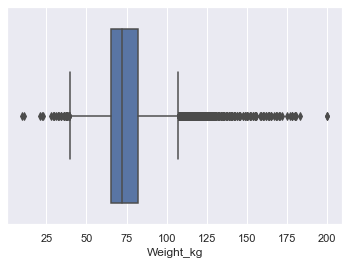

In [43]:
sns.boxplot(train['Weight_kg'])

In [44]:
train=drop_outliers(train,"Weight_kg")

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight_kg'>

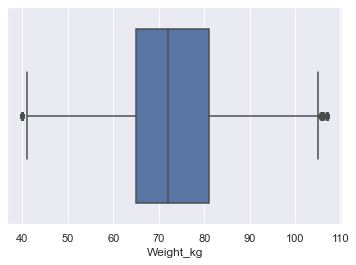

In [45]:
sns.boxplot(train['Weight_kg'])

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height_cm'>

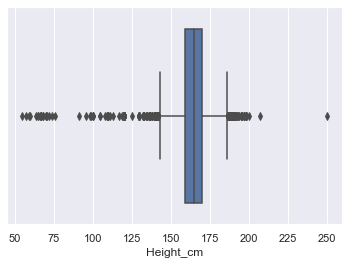

In [46]:
sns.boxplot(train['Height_cm'])

In [47]:
train=drop_outliers(train,"Height_cm")

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height_cm'>

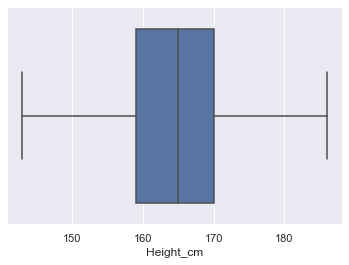

In [48]:
sns.boxplot(train['Height_cm'])

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bmi'>

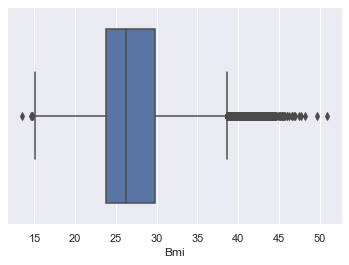

In [49]:
sns.boxplot(train['Bmi'])

In [50]:
train=drop_outliers(train,"Bmi")

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bmi'>

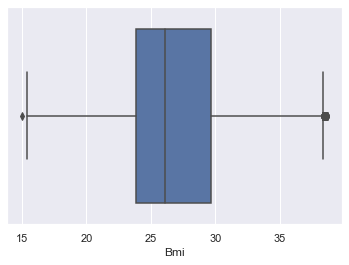

In [51]:
sns.boxplot(train['Bmi'])

In [52]:
train['Bmi'].unique()

array([33.83, 31.96, 26.14, ..., 16.49, 29.93, 17.47])

In [53]:
col=train.columns

In [54]:
col

Index(['Id', 'Age', 'Gender', 'Height_cm', 'Weight_kg', 'Ap_hi', 'Ap_lo',
       'Cholesterol', 'Glucose', 'Smokers', 'Alcohol', 'Active_exerciser',
       'Cardio', 'Age_in_years', 'Bmi', 'Bp_mmHg', 'Combined_risk_category',
       'pulse_pressure'],
      dtype='object')

## Action
## Dropping the ID column because it's irrelevant

In [55]:
train.drop(['Id'],axis=1, inplace=True)

In [56]:
check_dataset(train)

missing_value:
Age                       0
Gender                    0
Height_cm                 0
Weight_kg                 0
Ap_hi                     0
Ap_lo                     0
Cholesterol               0
Glucose                   0
Smokers                   0
Alcohol                   0
Active_exerciser          0
Cardio                    0
Age_in_years              0
Bmi                       0
Bp_mmHg                   0
Combined_risk_category    0
pulse_pressure            0
dtype: int64

duplicated_rows:
14


## Action
## dealing with duplicated Value that surfaced due to dropping the Id column

In [57]:
train.drop_duplicates(keep='first',inplace=True)
train.reset_index(drop=True,inplace=True)
train.head()

,Age,Gender,Height_cm,Weight_kg,Ap_hi,Ap_lo,Cholesterol,Glucose,Smokers,Alcohol,Active_exerciser,Cardio,Age_in_years,Bmi,Bp_mmHg,Combined_risk_category,pulse_pressure
0,18848,1,164,91.0,145,100,1,1,0,0,1,1,52,33.83,145/100,No Smoke or Alcohol Risk,45
1,21735,2,165,87.0,140,90,3,3,0,0,0,0,60,31.96,140/90,No Smoke or Alcohol Risk,50
2,15464,1,154,62.0,100,60,1,1,0,0,1,0,42,26.14,100/60,No Smoke or Alcohol Risk,40
3,19124,2,176,90.0,130,90,2,1,0,0,1,1,52,29.05,130/90,No Smoke or Alcohol Risk,40
4,22115,1,162,63.0,120,80,1,1,0,0,1,1,61,24.01,120/80,No Smoke or Alcohol Risk,40


In [58]:
check_dataset(train)

missing_value:
Age                       0
Gender                    0
Height_cm                 0
Weight_kg                 0
Ap_hi                     0
Ap_lo                     0
Cholesterol               0
Glucose                   0
Smokers                   0
Alcohol                   0
Active_exerciser          0
Cardio                    0
Age_in_years              0
Bmi                       0
Bp_mmHg                   0
Combined_risk_category    0
pulse_pressure            0
dtype: int64

duplicated_rows:
0


In [59]:
train.head(10)

,Age,Gender,Height_cm,Weight_kg,Ap_hi,Ap_lo,Cholesterol,Glucose,Smokers,Alcohol,Active_exerciser,Cardio,Age_in_years,Bmi,Bp_mmHg,Combined_risk_category,pulse_pressure
0,18848,1,164,91.0,145,100,1,1,0,0,1,1,52,33.83,145/100,No Smoke or Alcohol Risk,45
1,21735,2,165,87.0,140,90,3,3,0,0,0,0,60,31.96,140/90,No Smoke or Alcohol Risk,50
2,15464,1,154,62.0,100,60,1,1,0,0,1,0,42,26.14,100/60,No Smoke or Alcohol Risk,40
3,19124,2,176,90.0,130,90,2,1,0,0,1,1,52,29.05,130/90,No Smoke or Alcohol Risk,40
4,22115,1,162,63.0,120,80,1,1,0,0,1,1,61,24.01,120/80,No Smoke or Alcohol Risk,40
5,14350,2,170,86.0,130,80,2,1,0,0,1,0,39,29.76,130/80,No Smoke or Alcohol Risk,50
6,19669,1,156,88.0,120,70,1,1,0,0,0,1,54,36.16,120/70,No Smoke or Alcohol Risk,50
7,21675,1,165,78.0,130,90,2,1,0,0,1,0,59,28.65,130/90,No Smoke or Alcohol Risk,40
8,23322,1,150,85.0,145,90,1,1,0,0,1,1,64,37.78,145/90,No Smoke or Alcohol Risk,55
9,23148,1,163,74.0,120,80,1,1,0,0,1,0,63,27.85,120/80,No Smoke or Alcohol Risk,40


## Action
## Splitting data to Target(Dependent) and Variable(independent) data

In [60]:
X_train=train.drop(['Cardio'],axis=1)
y_train=train['Cardio']

In [61]:
cat1=[]
for i in X_train.columns:
    if X_train[i].dtype=="O":
        cat1.append(i)

In [62]:
cat1

['Bp_mmHg', 'Combined_risk_category']

## Encoding object columns

In [63]:
#encoder=OneHotEncoder(drop="first",dtype=int)

#enc_data=pd.DataFrame(encoder.fit_transform(X_train[cat1]).toarray())
#enc_data.columns= encoder.get_feature_names_out()
#X_train=X_train.join(enc_data)
#X_train.drop(cat1,axis=1,inplace=True)

encoder= OrdinalEncoder()

X_train[cat1]=encoder.fit_transform(X_train[cat1])

In [64]:
X_train.head(20)

,Age,Gender,Height_cm,Weight_kg,Ap_hi,Ap_lo,Cholesterol,Glucose,Smokers,Alcohol,Active_exerciser,Age_in_years,Bmi,Bp_mmHg,Combined_risk_category,pulse_pressure
0,18848,1,164,91.0,145,100,1,1,0,0,1,52,33.83,447.0,1.0,45
1,21735,2,165,87.0,140,90,3,3,0,0,0,60,31.96,413.0,1.0,50
2,15464,1,154,62.0,100,60,1,1,0,0,1,42,26.14,2.0,1.0,40
3,19124,2,176,90.0,130,90,2,1,0,0,1,52,29.05,308.0,1.0,40
4,22115,1,162,63.0,120,80,1,1,0,0,1,61,24.01,186.0,1.0,40
5,14350,2,170,86.0,130,80,2,1,0,0,1,39,29.76,298.0,1.0,50
6,19669,1,156,88.0,120,70,1,1,0,0,0,54,36.16,180.0,1.0,50
7,21675,1,165,78.0,130,90,2,1,0,0,1,59,28.65,308.0,1.0,40
8,23322,1,150,85.0,145,90,1,1,0,0,1,64,37.78,492.0,1.0,55
9,23148,1,163,74.0,120,80,1,1,0,0,1,63,27.85,186.0,1.0,40


In [65]:
X_train.shape

(53149, 16)

In [66]:
check_dataset(train)

missing_value:
Age                       0
Gender                    0
Height_cm                 0
Weight_kg                 0
Ap_hi                     0
Ap_lo                     0
Cholesterol               0
Glucose                   0
Smokers                   0
Alcohol                   0
Active_exerciser          0
Cardio                    0
Age_in_years              0
Bmi                       0
Bp_mmHg                   0
Combined_risk_category    0
pulse_pressure            0
dtype: int64

duplicated_rows:
0


## Action

## checking for Correlation and multicolinearity

<AxesSubplot:>

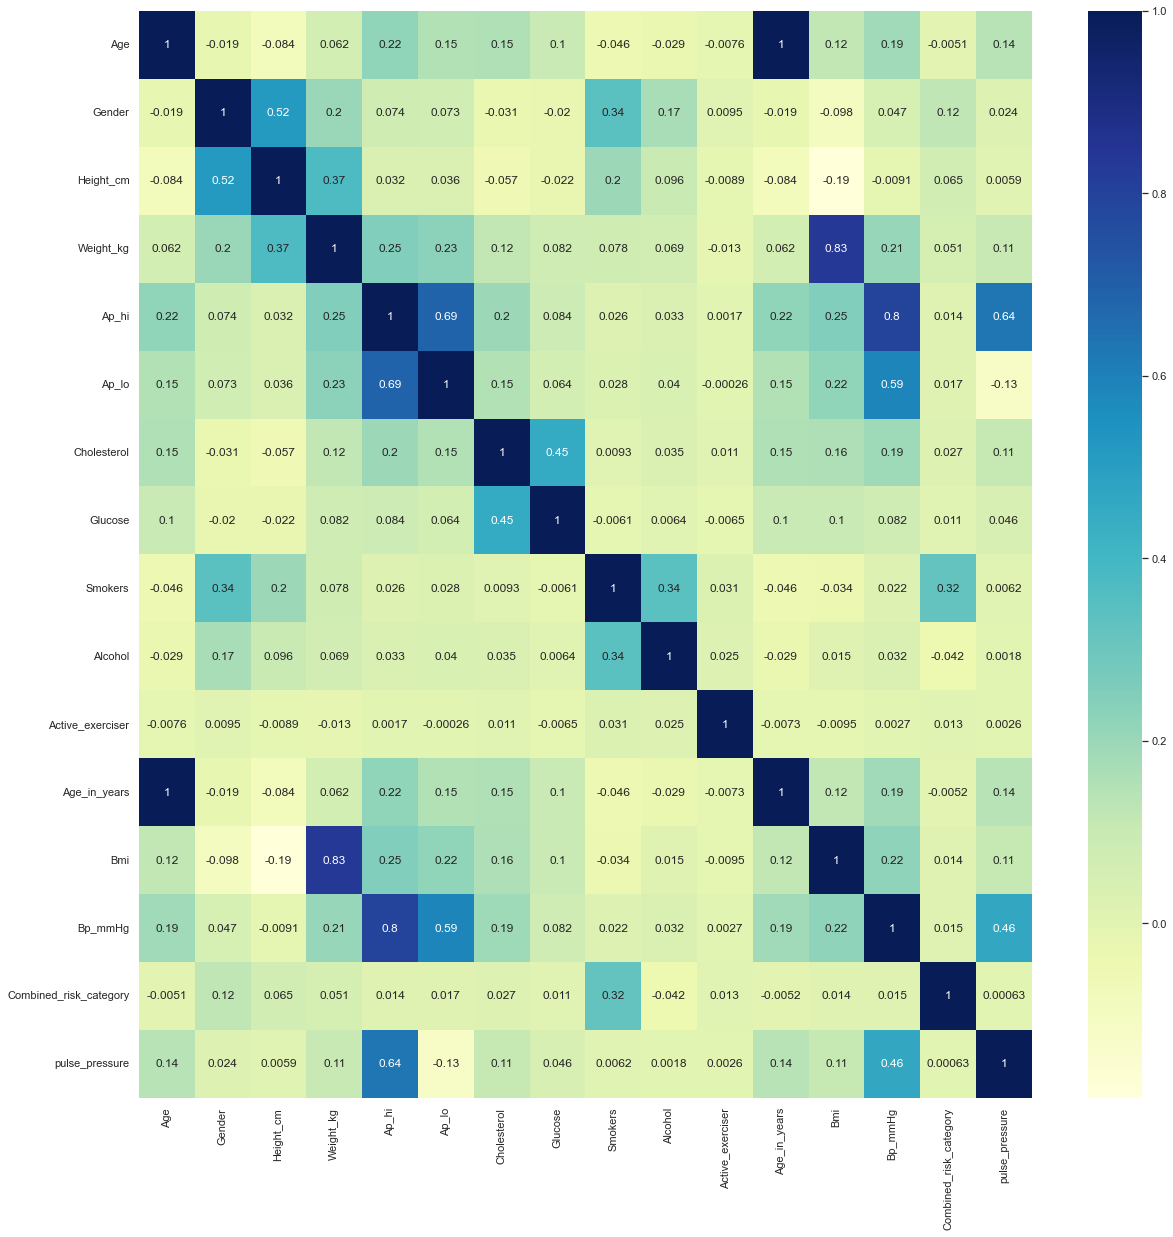

In [67]:

plt.figure(figsize=(20,20))
cors = X_train.corr()
sns.heatmap(cors, annot= True, cmap="YlGnBu")

<AxesSubplot:>

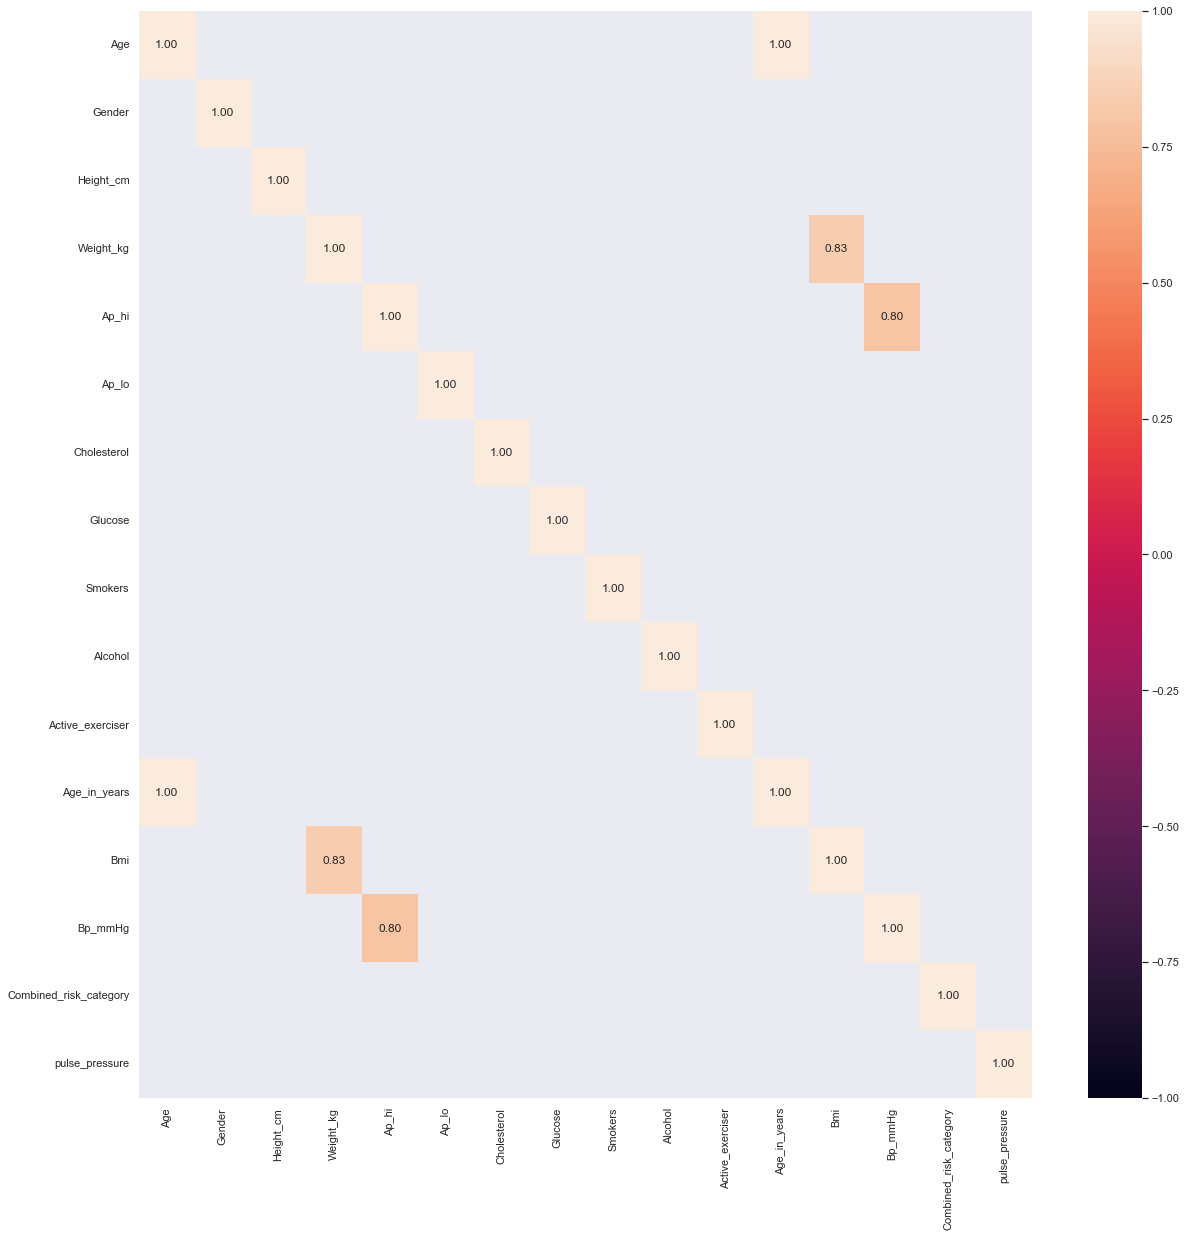

In [68]:
def thresholding(cap):
    mask = cors[(cors >= cap)|(cors <= -cap)]
    return mask

mask = thresholding(0.70)

plt.figure(figsize=(20,20))
sns.heatmap(mask, vmin=-1, vmax=1, annot=True, fmt='0.2f')

## Action
## Dropping Highly Correlated Column(Multicolinearity)

In [69]:
X_train.drop(['Age','Weight_kg','Ap_hi'], axis=1,inplace=True)

## Action 
## Scaling the data to reduce off Relative Magnitude

In [70]:
col1 = X_train.columns

In [71]:
#A9
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=col1)

In [72]:
X_train.head(10)

,Gender,Height_cm,Ap_lo,Cholesterol,Glucose,Smokers,Alcohol,Active_exerciser,Age_in_years,Bmi,Bp_mmHg,Combined_risk_category,pulse_pressure
0,0.0,0.488372,0.666667,0.0,0.0,0.0,0.0,1.0,0.628571,0.796524,0.846591,0.5,0.652174
1,1.0,0.511628,0.500000,1.0,1.0,0.0,0.0,0.0,0.857143,0.717253,0.782197,0.5,0.695652
2,0.0,0.255814,0.000000,0.0,0.0,0.0,0.0,1.0,0.342857,0.470538,0.003788,0.5,0.608696
3,1.0,0.767442,0.500000,0.5,0.0,0.0,0.0,1.0,0.628571,0.593896,0.583333,0.5,0.608696
4,0.0,0.441860,0.333333,0.0,0.0,0.0,0.0,1.0,0.885714,0.380246,0.352273,0.5,0.608696
5,1.0,0.627907,0.333333,0.5,0.0,0.0,0.0,1.0,0.257143,0.623993,0.564394,0.5,0.695652
6,0.0,0.302326,0.166667,0.0,0.0,0.0,0.0,0.0,0.685714,0.895295,0.340909,0.5,0.695652
7,0.0,0.511628,0.500000,0.5,0.0,0.0,0.0,1.0,0.828571,0.576939,0.583333,0.5,0.608696
8,0.0,0.162791,0.500000,0.0,0.0,0.0,0.0,1.0,0.971429,0.963968,0.931818,0.5,0.739130
9,0.0,0.465116,0.333333,0.0,0.0,0.0,0.0,1.0,0.942857,0.543027,0.352273,0.5,0.608696


In [73]:
#from skfeature.function.similarity_based import fisher_score
#import matplotlib.pyplot as plt
#X=X_train
#Y=y_train
#ranks = fisher_score.fisher_score(X,Y)

#feature_importance=pd.Series(ranks,X.columns[0:-1])
#feat_importance.plot(kind='barh',color='teal')
#plt.show()

## Action
## Feature Selection 

In [74]:
from sklearn.feature_selection import SelectKBest,f_classif

k=5
selector=SelectKBest(f_classif,k=5)
X_res_new=selector.fit_transform(X_train, y_train)
scores= pd.DataFrame({'Features':X_train.columns,'Score':selector.scores_})
top_feat=scores.sort_values('Score',ascending=False)
top_feat.head(15)


,Features,Score
10,Bp_mmHg,11241.398370
2,Ap_lo,6787.112439
12,pulse_pressure,3508.570394
8,Age_in_years,3272.900371
3,Cholesterol,2652.094961
9,Bmi,1869.971209
4,Glucose,401.124388
7,Active_exerciser,72.045051
5,Smokers,14.412773
0,Gender,11.456074


In [75]:
decision_tree = DecisionTreeClassifier(max_depth = 10)
decision_tree.fit(X_train, y_train)
predictors = col1 

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()
coef.head(40)

Bp_mmHg                   0.687932
Age_in_years              0.116657
Cholesterol               0.064241
Bmi                       0.051446
Height_cm                 0.027174
pulse_pressure            0.015366
Glucose                   0.011293
Active_exerciser          0.009634
Ap_lo                     0.006618
Gender                    0.003038
Combined_risk_category    0.002958
Smokers                   0.002252
Alcohol                   0.001391
dtype: float64

## Action
## dropping the less important features that drives CVD

In [76]:
X_train.drop(['Combined_risk_category','Alcohol','Height_cm','Gender','Smokers','Active_exerciser','Glucose','Bmi'],axis=1,inplace=True)

## Action

### Balancing the Target and train dataset

In [77]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE()
# Apply SMOTE to your dataset
X_resampled, y_resampled =smote.fit_resample(X_train, y_train)

In [78]:
X_resampled.head(10)

,Ap_lo,Cholesterol,Age_in_years,Bp_mmHg,pulse_pressure
0,0.666667,0.0,0.628571,0.846591,0.652174
1,0.500000,1.0,0.857143,0.782197,0.695652
2,0.000000,0.0,0.342857,0.003788,0.608696
3,0.500000,0.5,0.628571,0.583333,0.608696
4,0.333333,0.0,0.885714,0.352273,0.608696
5,0.333333,0.5,0.257143,0.564394,0.695652
6,0.166667,0.0,0.685714,0.340909,0.695652
7,0.500000,0.5,0.828571,0.583333,0.608696
8,0.500000,0.0,0.971429,0.931818,0.739130
9,0.333333,0.0,0.942857,0.352273,0.608696


In [79]:
y_resampled.value_counts()

1    27032
0    27032
Name: Cardio, dtype: int64

In [80]:
def prepare(df):
    df.reset_index(drop=True, inplace=True)
    df.loc[df['Ap_hi'] < 90,'Ap_hi'] = 90
    df.loc[df['Ap_hi'] > 145,'Ap_hi'] = 145
    df.loc[df['Ap_lo'] < 60, 'Ap_lo'] =60
    df.loc[df['Ap_lo'] > 120,'Ap_lo'] =120
    df['Age_in_years']=(df['Age']/365).round().astype(int)
    df["Bmi"]=cal_bmi(df['Height_cm'], df['Weight_kg'])
    df["Bp_mmHg"]=df['Ap_hi'].astype(str) + '/' + df['Ap_lo'].astype(str)
    df['Combined_risk_category'] = df['Smokers'] + df['Alcohol']
    df['Combined_risk_category'] = df['Combined_risk_category'].map({2:'High Risk',
                                                                     1:'Risk',
                                                                     0:"No Smoke or Alcohol Risk"})
    df['pulse_pressure'] = df['Ap_hi'] - df['Ap_lo']
    df=drop_outliers(df,"Weight_kg")
    df=drop_outliers(df,"Height_cm")
    df=drop_outliers(df,"Bmi")
    col1=df.columns
    df.drop(['Id'],axis=1, inplace=True)
    df.drop_duplicates(keep='first',inplace=True)
    df.reset_index(drop=True,inplace=True)
    X_test=test.drop(['Cardio'],axis=1)
    y_test=test['Cardio']
    cat2=['Bp_mmHg', 'Combined_risk_category']
    encoder= OrdinalEncoder()
    X_test[cat2]=encoder.fit_transform(X_test[cat2])
    X_test.drop(['Age','Weight_kg','Ap_hi','Id'], axis=1,inplace=True)
    col2 = X_test.columns
    X_test = scaler.fit_transform(X_test)
    X_test = pd.DataFrame(X_test, columns=col2)
    X_test.drop(['Combined_risk_category','Alcohol','Height_cm','Gender','Smokers','Active_exerciser','Glucose','Bmi'],axis=1,inplace=True)

    return X_test,y_test

    
    
    
    
    

In [81]:
X_test,y_test=prepare(test)

In [82]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo == 'LGBMC':
        model = LGBMClassifier()
    elif input_ml_algo=='KNN':
        model=KNeighborsClassifier()
    return model

In [83]:
def performance(model,X_train,y_train,X_test,y_test):
    y_pred=model.predict(X_test)
    y_pred_prob=model.predict_proba(X_test)
    y_pred_prob= [x[1] for x in y_pred_prob]
    
    disp=ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap="Blues",values_format="d")
    
    print("\n Accuracy score:\n", accuracy_score(y_test,y_pred))
    print("\n AUC Score:\n", roc_auc_score(y_test,y_pred_prob))
    print("\n Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
    print("\n Classification report:\n", classification_report(y_test,y_pred))
    
    print("\n Roc curve: \n")
    sns.set_style("white")
    plot_roc_curve(model,X_test,y_test)
    plt.show()

In [84]:
X_test

,Ap_lo,Cholesterol,Age_in_years,Bp_mmHg,pulse_pressure
0,0.166667,0.0,0.153846,0.125506,0.608696
1,0.166667,0.0,0.269231,0.125506,0.608696
2,0.333333,0.0,0.730769,0.360324,0.608696
3,0.166667,0.0,0.423077,0.125506,0.608696
4,0.500000,1.0,1.000000,0.732794,0.695652
...,...,...,...,...,...
13995,0.166667,0.0,0.346154,0.125506,0.608696
13996,0.333333,0.0,0.192308,0.360324,0.608696
13997,0.333333,0.0,0.500000,0.360324,0.608696
13998,0.150000,0.0,0.000000,0.016194,0.530435


In [85]:
y_test

0        1
1        0
2        1
3        0
4        1
        ..
13995    1
13996    1
13997    1
13998    0
13999    0
Name: Cardio, Length: 14000, dtype: int64

In [86]:
y_test.value_counts()

0    7042
1    6958
Name: Cardio, dtype: int64


 Accuracy score:
 0.6836428571428571

 AUC Score:
 0.7037766420815639

 Confusion Matrix:
 [[5378 1664]
 [2765 4193]]

 Classification report:
               precision    recall  f1-score   support

           0       0.66      0.76      0.71      7042
           1       0.72      0.60      0.65      6958

    accuracy                           0.68     14000
   macro avg       0.69      0.68      0.68     14000
weighted avg       0.69      0.68      0.68     14000


 Roc curve: 



C:\Users\emmanul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


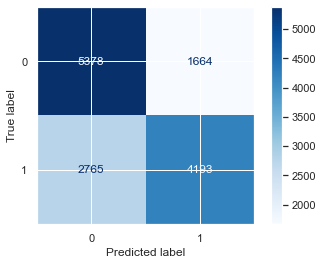

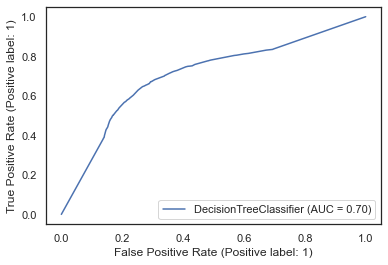

In [87]:
model1 = model_to_use("DT")
model1.fit(X_resampled, y_resampled)
performance(model1,X_resampled, y_resampled,X_test, y_test)


 Accuracy score:
 0.7052142857142857

 AUC Score:
 0.7565691140391257

 Confusion Matrix:
 [[5351 1691]
 [2436 4522]]

 Classification report:
               precision    recall  f1-score   support

           0       0.69      0.76      0.72      7042
           1       0.73      0.65      0.69      6958

    accuracy                           0.71     14000
   macro avg       0.71      0.70      0.70     14000
weighted avg       0.71      0.71      0.70     14000


 Roc curve: 



C:\Users\emmanul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


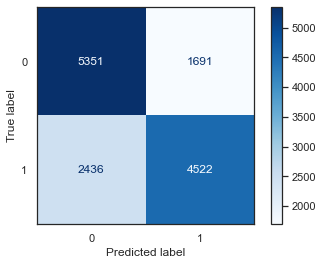

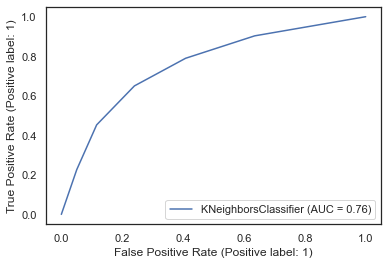

In [88]:
model2 = model_to_use("KNN")
model2.fit(X_resampled, y_resampled)
performance(model2,X_resampled, y_resampled,X_test, y_test)


 Accuracy score:
 0.7231428571428572

 AUC Score:
 0.7825479472363046

 Confusion Matrix:
 [[5517 1525]
 [2351 4607]]

 Classification report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      7042
           1       0.75      0.66      0.70      6958

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000


 Roc curve: 



C:\Users\emmanul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


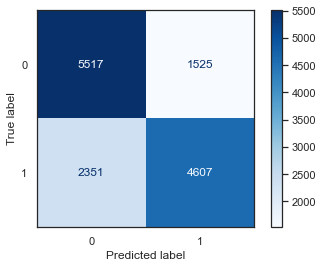

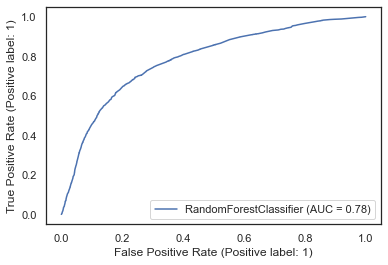

In [89]:
model3 = model_to_use("RF")
model3.fit(X_resampled, y_resampled)
performance(model3,X_resampled, y_resampled,X_test, y_test)


 Accuracy score:
 0.7275

 AUC Score:
 0.7852897704317355

 Confusion Matrix:
 [[5569 1473]
 [2342 4616]]

 Classification report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74      7042
           1       0.76      0.66      0.71      6958

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000


 Roc curve: 



C:\Users\emmanul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


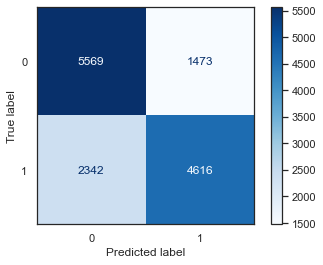

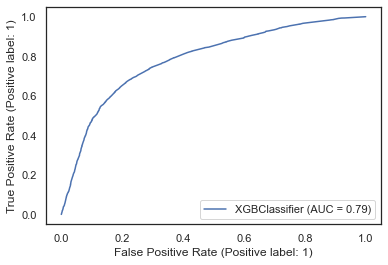

In [90]:
model4 = model_to_use("XGBC")
model4.fit(X_resampled, y_resampled)
performance(model4,X_resampled, y_resampled,X_test, y_test)


 Accuracy score:
 0.7271428571428571

 AUC Score:
 0.791917733528203

 Confusion Matrix:
 [[5702 1340]
 [2480 4478]]

 Classification report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75      7042
           1       0.77      0.64      0.70      6958

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000


 Roc curve: 



C:\Users\emmanul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


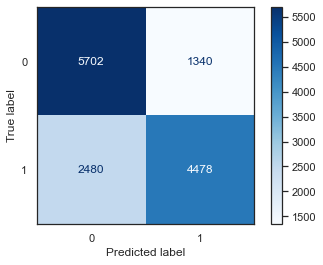

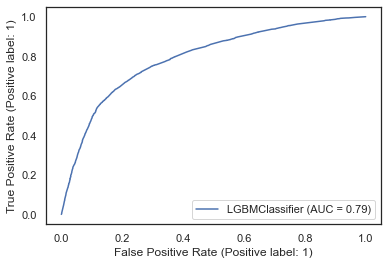

In [91]:
model5 = model_to_use("LGBMC")
model5.fit(X_resampled, y_resampled)
performance(model5,X_resampled, y_resampled,X_test, y_test)

In [92]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

## Cross validation for model 5

In [93]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Assuming you have your training and testing data and labels in X_train, X_test, y_train, y_test respectively

# Define the number of folds for cross-validation
num_folds = 5

# Create the cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create an instance of your model

# Perform cross-validation on the training data
train_scores = cross_val_score(model5,X_resampled, y_resampled, cv=kfold)

# Fit the model on the training data
model5.fit(X_resampled, y_resampled)

# Evaluate the model on the test data
test_score = model5.score(X_test, y_test)

# Print the cross-validation scores and test score
print("Cross-validation scores:", train_scores)
print("Average score:", train_scores.mean())
print("Test score:", test_score)


Cross-validation scores: [0.73124942 0.7313419  0.72533062 0.7313419  0.73214946]
Average score: 0.7302826625259143
Test score: 0.7271428571428571


## cross Validation for model 4

In [94]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Assuming you have your training and testing data and labels in X_train, X_test, y_train, y_test respectively

# Define the number of folds for cross-validation
num_folds = 5

# Create the cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create an instance of your model

# Perform cross-validation on the training data
train_scores = cross_val_score(model4,X_resampled, y_resampled, cv=kfold)

# Fit the model on the training data
model4.fit(X_resampled, y_resampled)

# Evaluate the model on the test data
test_score = model4.score(X_test, y_test)

# Print the cross-validation scores and test score
print("Cross-validation scores:", train_scores)
print("Average score:", train_scores.mean())
print("Test score:", test_score)


Cross-validation scores: [0.73106446 0.72865995 0.7239434  0.7279201  0.72983722]
Average score: 0.7282850242711164
Test score: 0.7275


## Cross Validaton for model 3

In [95]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Assuming you have your training and testing data and labels in X_train, X_test, y_train, y_test respectively

# Define the number of folds for cross-validation
num_folds = 5

# Create the cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create an instance of your model

# Perform cross-validation on the training data
train_scores = cross_val_score(model3,X_resampled, y_resampled, cv=kfold)

# Fit the model on the training data
model3.fit(X_resampled, y_resampled)

# Evaluate the model on the test data
test_score = model3.score(X_test, y_test)

# Print the cross-validation scores and test score
print("Cross-validation scores:", train_scores)
print("Average score:", train_scores.mean())
print("Test score:", test_score)


Cross-validation scores: [0.72468325 0.72727273 0.71432535 0.72292611 0.72410285]
Average score: 0.7226620568361913
Test score: 0.7177142857142857


## Cross validation for model 2

In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Assuming you have your training and testing data and labels in X_train, X_test, y_train, y_test respectively

# Define the number of folds for cross-validation
num_folds = 5

# Create the cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create an instance of your model

# Perform cross-validation on the training data
train_scores = cross_val_score(model2,X_resampled, y_resampled, cv=kfold)

# Fit the model on the training data
model2.fit(X_resampled, y_resampled)

# Evaluate the model on the test data
test_score = model2.score(X_test, y_test)

# Print the cross-validation scores and test score
print("Cross-validation scores:", train_scores)
print("Average score:", train_scores.mean())
print("Test score:", test_score)


Cross-validation scores: [0.70498474 0.69860353 0.68380653 0.69518173 0.69626341]
Average score: 0.6957679878555632
Test score: 0.7052142857142857


## Cross validation for model 1

In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Assuming you have your training and testing data and labels in X_train, X_test, y_train, y_test respectively

# Define the number of folds for cross-validation
num_folds = 5

# Create the cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create an instance of your model

# Perform cross-validation on the training data
train_scores = cross_val_score(model1,X_resampled, y_resampled, cv=kfold)

# Fit the model on the training data
model1.fit(X_resampled, y_resampled)

# Evaluate the model on the test data
test_score = model1.score(X_test, y_test)

# Print the cross-validation scores and test score
print("Cross-validation scores:", train_scores)
print("Average score:", train_scores.mean())
print("Test score:", test_score)


Cross-validation scores: [0.72107648 0.72320355 0.71386294 0.72116896 0.72058824]
Average score: 0.7199800349252806
Test score: 0.6891428571428572


## Section 
## Exploratory Data Analysis Section

In [98]:
eda=pd.read_csv('cardio.csv',delimiter=';')

In [99]:
new_column_names = {
    'id':'Id',
    'age':'Age',
    'gender':'Gender',
    'height':'Height_cm',
    'weight':'Weight_kg',
    'ap_hi':'Ap_hi',
    'ap_lo':'Ap_lo',
    'cholesterol':'Cholesterol',
    'gluc':'Glucose',
    'smoke':'Smokers',
    'alco':'Alcohol',
    'active':'Active_exerciser',
    'cardio':'Cardio'
}

eda = eda.rename(columns=new_column_names)

In [100]:
def EDA_processing (eda):
    eda.reset_index(drop=True, inplace=True)
    eda.loc[eda['Ap_hi'] < 90,'Ap_hi'] = 90
    eda.loc[eda['Ap_hi'] > 145,'Ap_hi'] = 145
    eda.loc[eda['Ap_lo'] < 60, 'Ap_lo'] =60
    eda.loc[eda['Ap_lo'] > 120,'Ap_lo'] =120
    eda['Age_in_years']=(eda['Age']/365).round().astype(int)
    eda["Bmi"]=cal_bmi(eda['Height_cm'], eda['Weight_kg'])
    eda["Bp_mmHg"]=eda['Ap_hi'].astype(str) + '/' + eda['Ap_lo'].astype(str)
    eda['Combined_risk_category'] = eda['Smokers'] + eda['Alcohol']
    eda['Combined_risk_category'] = eda['Combined_risk_category'].map({2:'High Risk',
                                                                     1:'Risk',
                                                                     0:"No Smoke or Alcohol Risk"})
    eda['pulse_pressure'] = eda['Ap_hi'] - eda['Ap_lo']
    eda=drop_outliers(eda,"Weight_kg")
    eda=drop_outliers(eda,"Height_cm")
    eda=drop_outliers(eda,"Bmi")
    col1=eda.columns
    eda.drop(['Id'],axis=1, inplace=True)
    eda.drop_duplicates(keep='first',inplace=True)
    eda.reset_index(drop=True,inplace=True)
    return eda

In [101]:
eda = EDA_processing (eda)

In [102]:
eda.head(10)

,Age,Gender,Height_cm,Weight_kg,Ap_hi,Ap_lo,Cholesterol,Glucose,Smokers,Alcohol,Active_exerciser,Cardio,Age_in_years,Bmi,Bp_mmHg,Combined_risk_category,pulse_pressure
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.97,110/80,No Smoke or Alcohol Risk,30
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.93,140/90,No Smoke or Alcohol Risk,50
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.51,130/70,No Smoke or Alcohol Risk,60
3,17623,2,169,82.0,145,100,1,1,0,0,1,1,48,28.71,145/100,No Smoke or Alcohol Risk,45
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.01,100/60,No Smoke or Alcohol Risk,40
5,21914,1,151,67.0,120,80,2,2,0,0,0,0,60,29.38,120/80,No Smoke or Alcohol Risk,40
6,22113,1,157,93.0,130,80,3,1,0,0,1,0,61,37.73,130/80,No Smoke or Alcohol Risk,50
7,22584,2,178,95.0,130,90,3,3,0,0,1,1,62,29.98,130/90,No Smoke or Alcohol Risk,40
8,17668,1,158,71.0,110,70,1,1,0,0,1,0,48,28.44,110/70,No Smoke or Alcohol Risk,40
9,19834,1,164,68.0,110,60,1,1,0,0,0,0,54,25.28,110/60,No Smoke or Alcohol Risk,50


In [103]:
check_dataset(eda)

missing_value:
Age                       0
Gender                    0
Height_cm                 0
Weight_kg                 0
Ap_hi                     0
Ap_lo                     0
Cholesterol               0
Glucose                   0
Smokers                   0
Alcohol                   0
Active_exerciser          0
Cardio                    0
Age_in_years              0
Bmi                       0
Bp_mmHg                   0
Combined_risk_category    0
pulse_pressure            0
dtype: int64

duplicated_rows:
0


     Age  Gender  Height_cm  Weight_kg  Ap_hi  Ap_lo  Cholesterol  Glucose  \
0  18393       2        168       62.0    110     80            1        1   
1  20228       1        156       85.0    140     90            3        1   
2  18857       1        165       64.0    130     70            3        1   
3  17623       2        169       82.0    145    100            1        1   
4  17474       1        156       56.0    100     60            1        1   

   Smokers  Alcohol  Active_exerciser  Cardio  Age_in_years    Bmi  Bp_mmHg  \
0        0        0                 1       0            50  21.97   110/80   
1        0        0                 1       1            55  34.93   140/90   
2        0        0                 0       1            52  23.51   130/70   
3        0        0                 1       1            48  28.71  145/100   
4        0        0                 0       0            48  23.01   100/60   

     Combined_risk_category  pulse_pressure  
0  No Smok

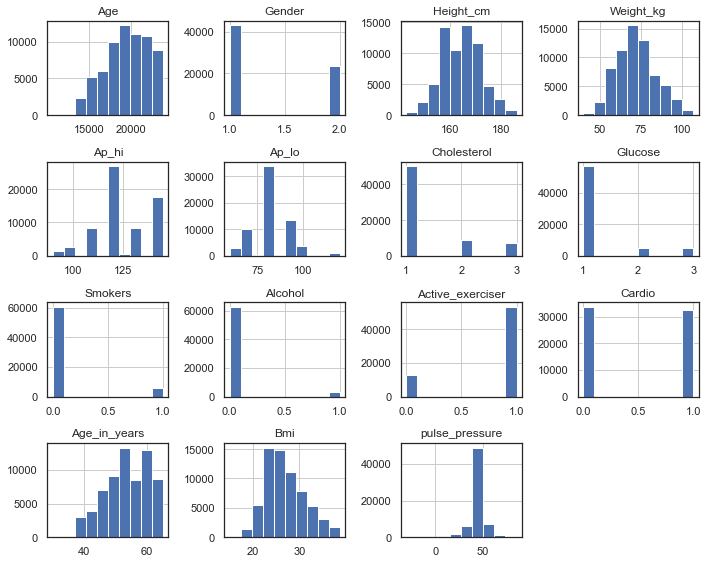

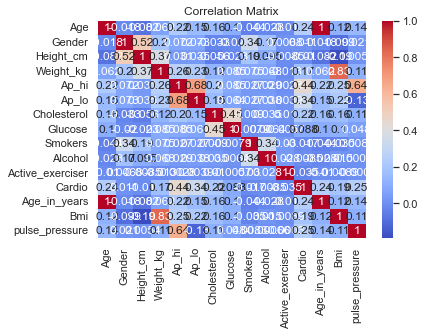

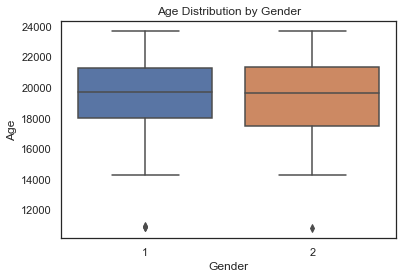

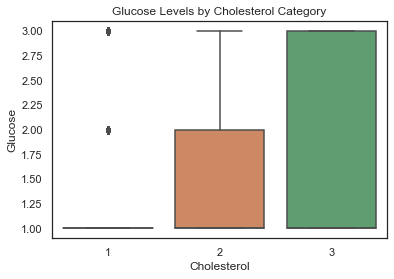

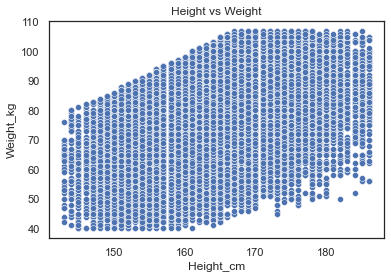

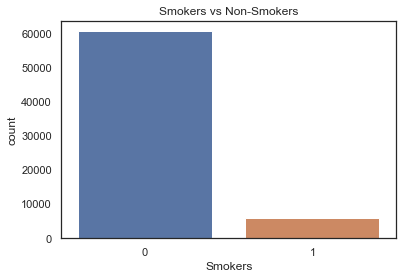

In [108]:

# Display the first few rows of the DataFrame
print(eda.head())

# Summary statistics
print(eda.describe())

# Data distribution
eda.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = eda.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Box plots
sns.boxplot(x="Gender", y="Age_in_years", data=eda)
plt.title("Age Distribution by Gender")
plt.show()

sns.boxplot(x="Cholesterol", y="Glucose", data=eda)
plt.title("Glucose Levels by Cholesterol Category")
plt.show()

# Scatter plot
sns.scatterplot(x="Height_cm", y="Weight_kg", data=eda)
plt.title("Height vs Weight")
plt.show()

# Bar plot
sns.countplot(x="Smokers", data=eda)
plt.title("Smokers vs Non-Smokers")
plt.show()

# Additional EDA as per your requirement
# ...



1    50207
2     8888
3     7324
Name: Cholesterol, dtype: int64


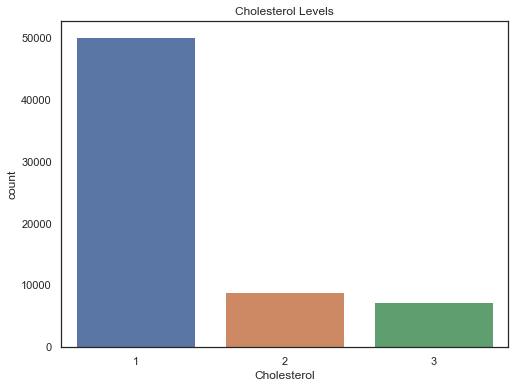

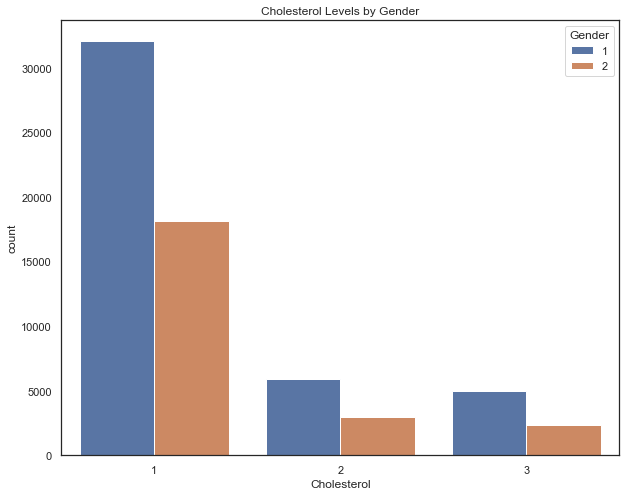

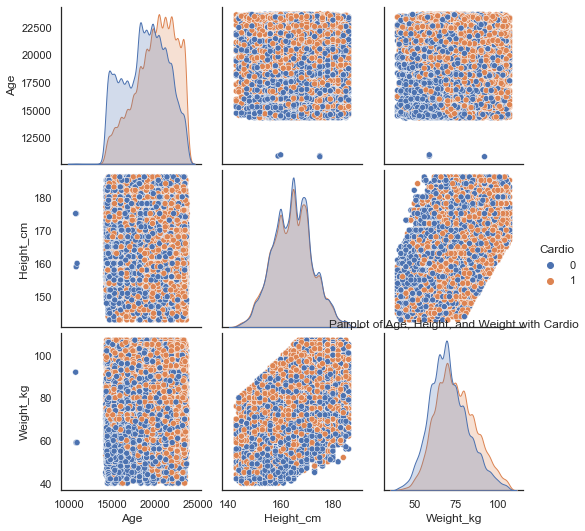

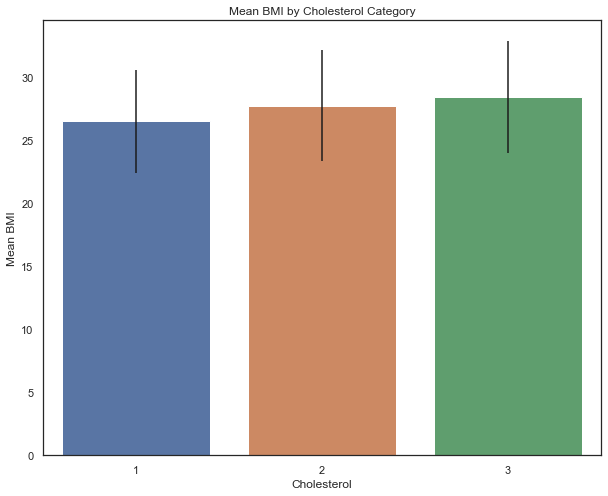

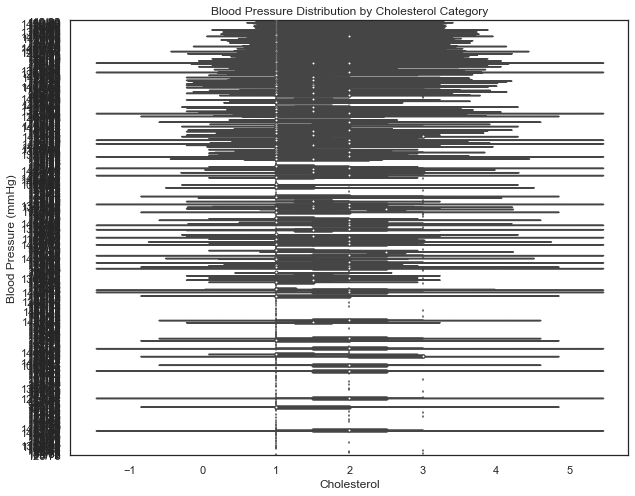

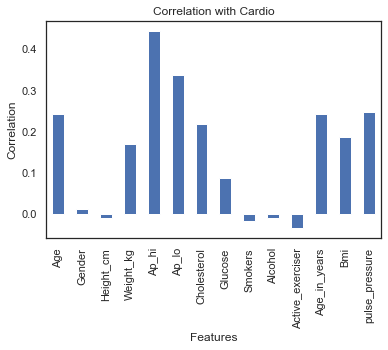

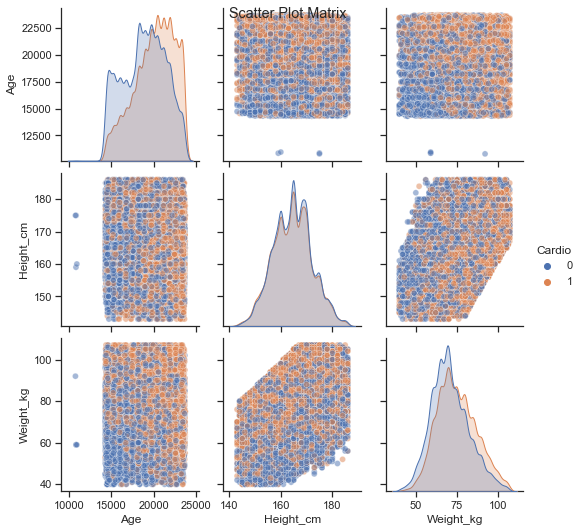

In [109]:
# Value counts
value_counts = eda['Cholesterol'].value_counts()
print(value_counts)

# Bar plot of value counts
plt.figure(figsize=(8, 6))
sns.countplot(x='Cholesterol', data=eda)
plt.title('Cholesterol Levels')
plt.show()

# Grouped bar plot
plt.figure(figsize=(10, 8))
sns.countplot(x='Cholesterol', hue='Gender', data=eda)
plt.title('Cholesterol Levels by Gender')
plt.show()

# Pairplot
sns.pairplot(eda, vars=['Age_in_years', 'Height_cm', 'Weight_kg'], hue='Cardio')
plt.title('Pairplot of Age, Height, and Weight with Cardio')
plt.show()

# Bar plot with error bars
mean_bmi = eda.groupby('Cholesterol')['Bmi'].mean()
std_bmi = eda.groupby('Cholesterol')['Bmi'].std()

plt.figure(figsize=(10, 8))
sns.barplot(x=mean_bmi.index, y=mean_bmi.values, yerr=std_bmi.values)
plt.title('Mean BMI by Cholesterol Category')
plt.xlabel('Cholesterol')
plt.ylabel('Mean BMI')
plt.show()

# Violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(x='Cholesterol', y='Bp_mmHg', data=eda)
plt.title('Blood Pressure Distribution by Cholesterol Category')
plt.xlabel('Cholesterol')
plt.ylabel('Blood Pressure (mmHg)')
plt.show()

# Correlation with the target variable
correlation_with_cardio = eda.corr()['Cardio'].drop('Cardio')
correlation_with_cardio.plot(kind='bar')
plt.title('Correlation with Cardio')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

# Scatter plot matrix
sns.set(style='ticks')
sns.pairplot(eda, vars=['Age_in_years', 'Height_cm', 'Weight_kg'], hue='Cardio', plot_kws={'alpha': 0.5})
plt.suptitle('Scatter Plot Matrix')
plt.show()

# Additional EDA as per your requirement
# ...



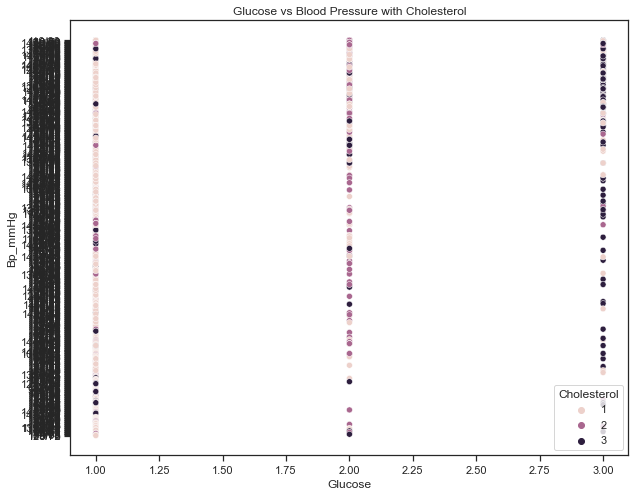

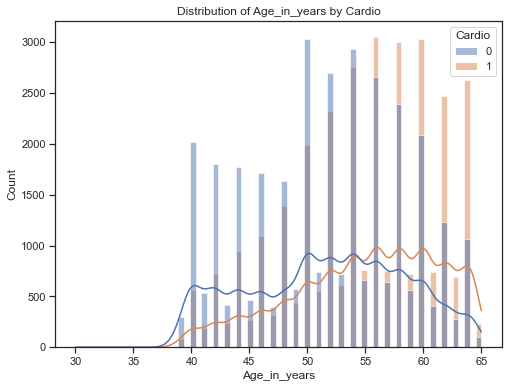

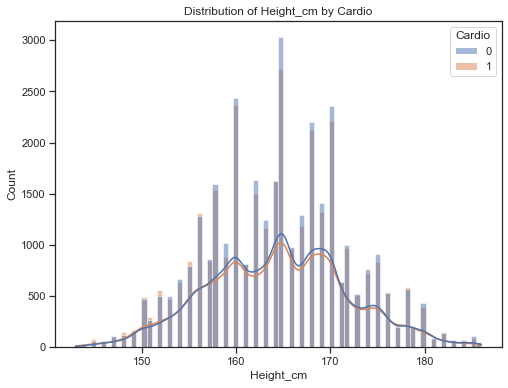

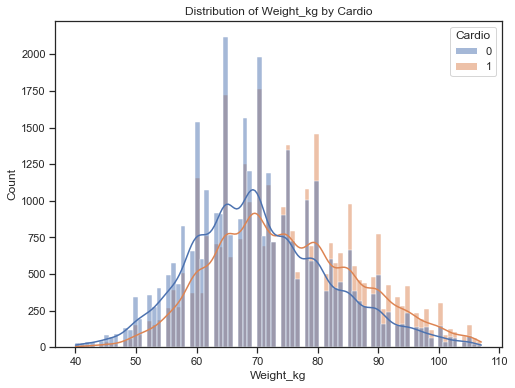

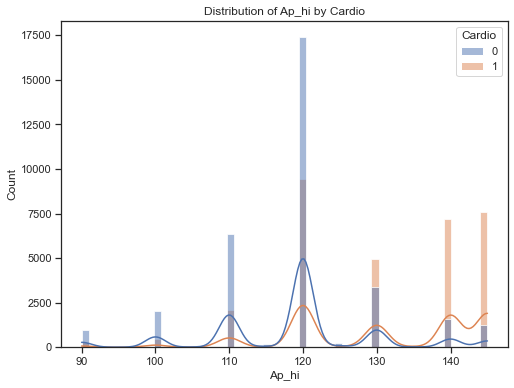

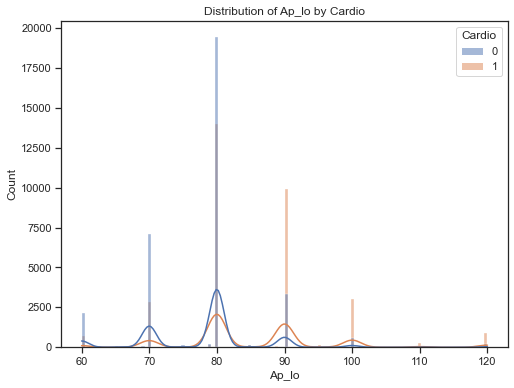

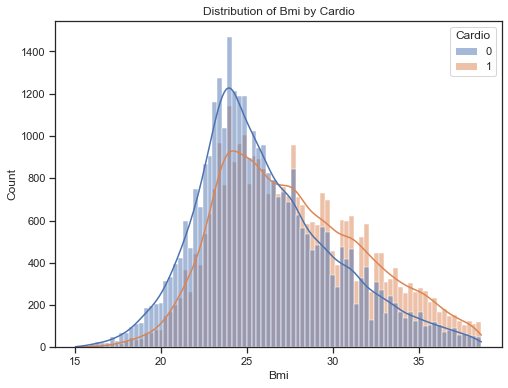

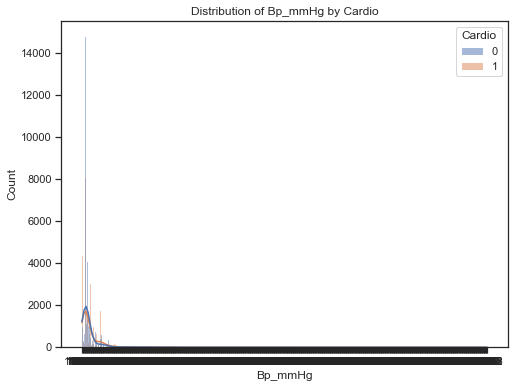

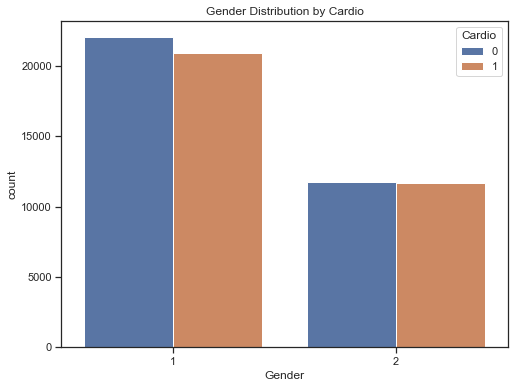

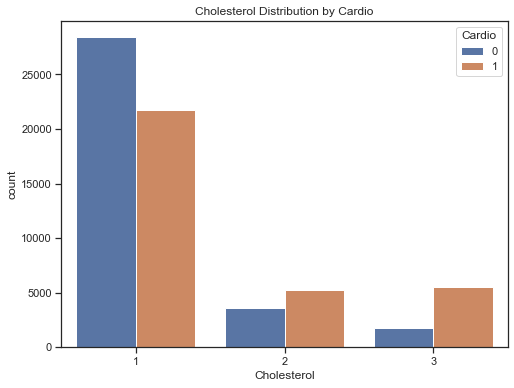

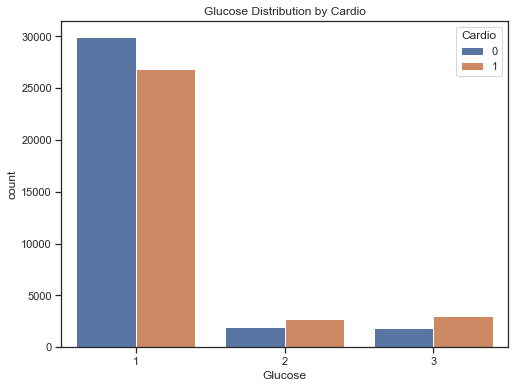

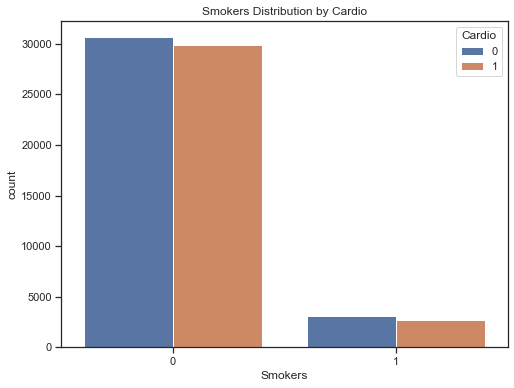

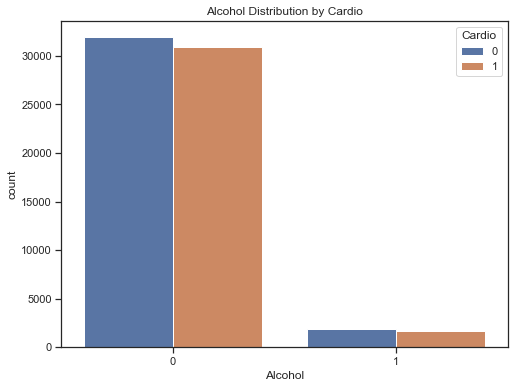

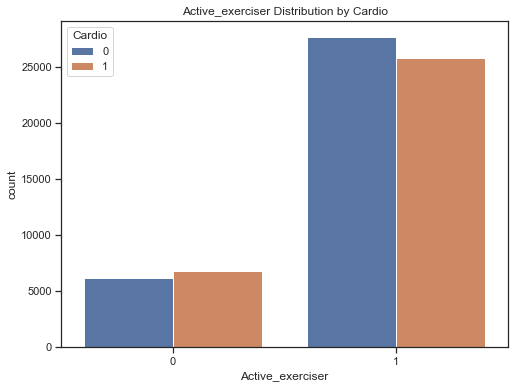

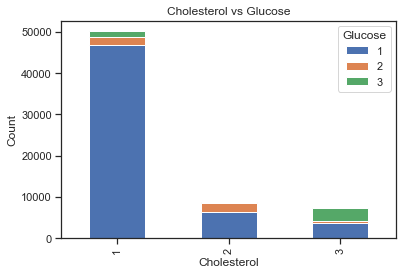

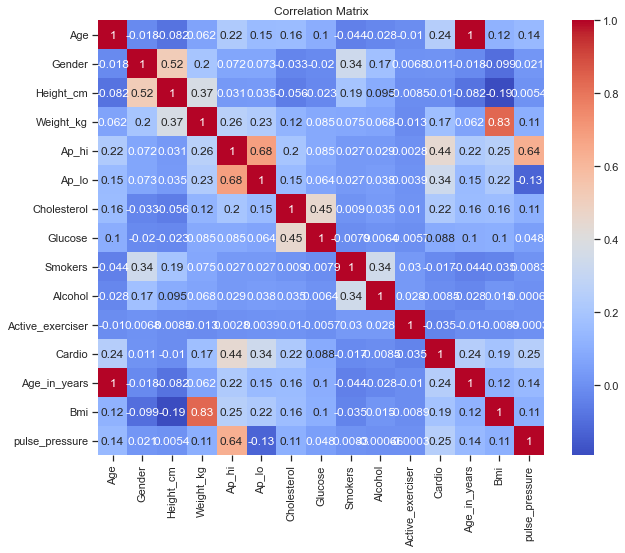

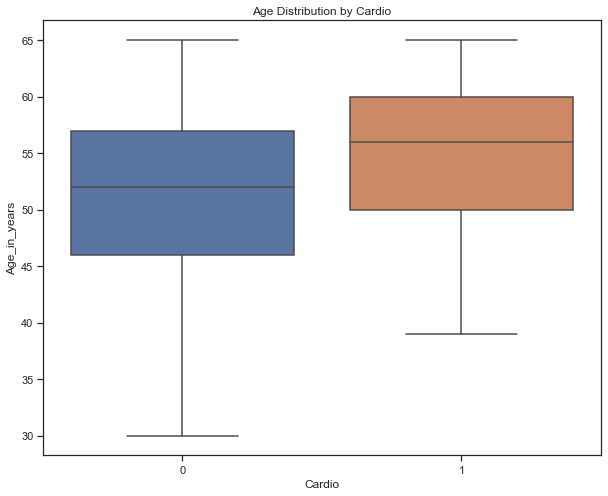

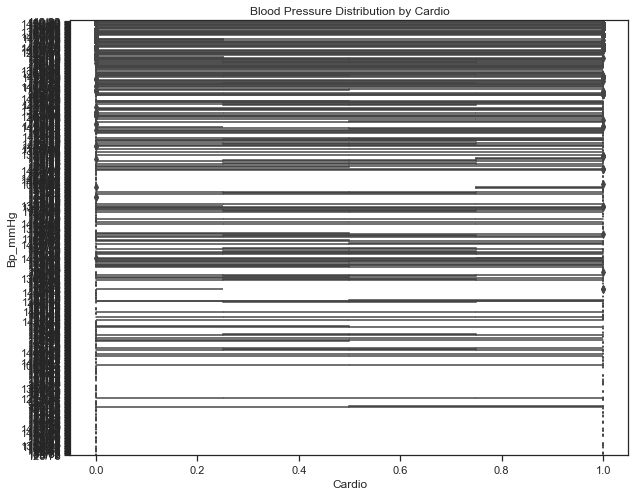

In [112]:
# Scatter plot with color encoding
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Glucose', y='Bp_mmHg', hue='Cholesterol', data=eda)
plt.title('Glucose vs Blood Pressure with Cholesterol')
plt.show()

# Distribution of numerical variables by target variable
numerical_cols = ['Age_in_years', 'Height_cm', 'Weight_kg', 'Ap_hi', 'Ap_lo', 'Bmi', 'Bp_mmHg']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=eda, x=col, hue='Cardio', kde=True)
    plt.title(f'Distribution of {col} by Cardio')
    plt.show()

# Bar plot of categorical variables by target variable
categorical_cols = ['Gender', 'Cholesterol', 'Glucose', 'Smokers', 'Alcohol', 'Active_exerciser']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=eda, x=col, hue='Cardio')
    plt.title(f'{col} Distribution by Cardio')
    plt.show()

# Stacked bar plot
cross_tab = pd.crosstab(eda['Cholesterol'], eda['Glucose'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Cholesterol vs Glucose')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

# Heatmap of correlation matrix with annotation
plt.figure(figsize=(10, 8))
sns.heatmap(eda.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Box plots by target variable
plt.figure(figsize=(10, 8))
sns.boxplot(x='Cardio', y='Age_in_years', data=eda)
plt.title('Age Distribution by Cardio')
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='Cardio', y='Bp_mmHg', data=eda)
plt.title('Blood Pressure Distribution by Cardio')
plt.show()

# Additional EDA as per your requirement
# ...



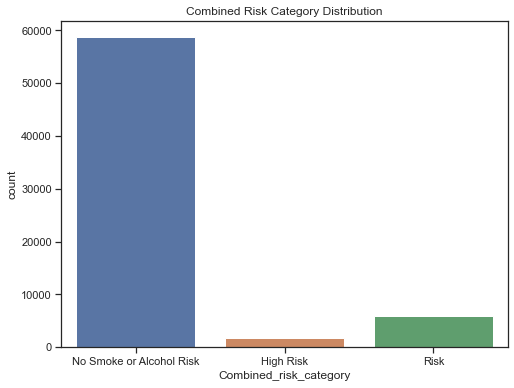

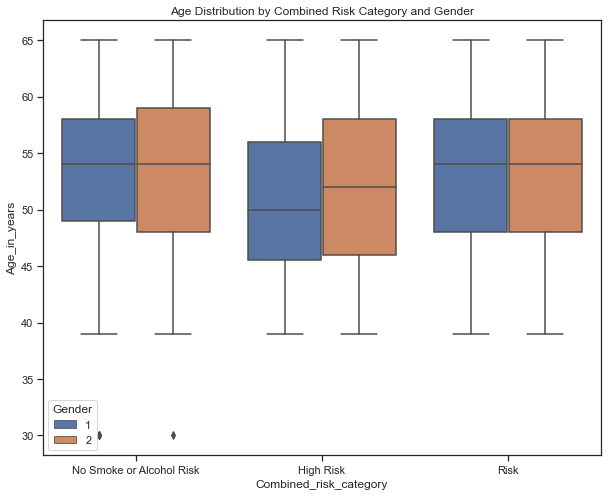

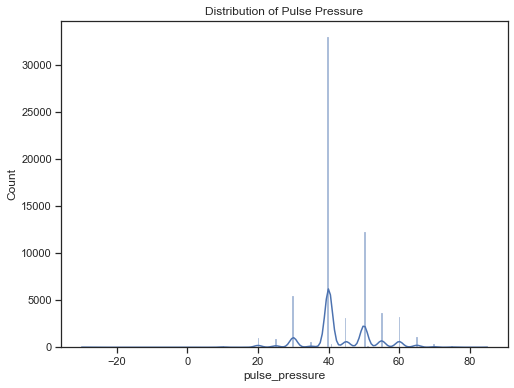

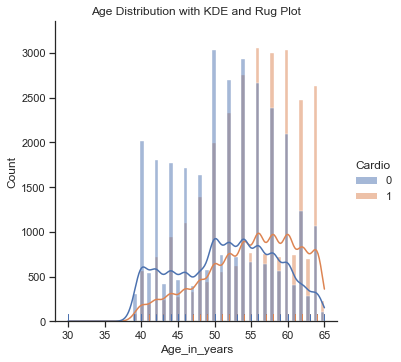

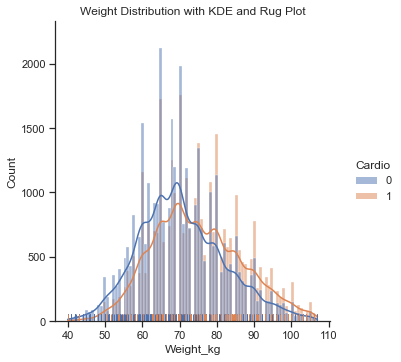

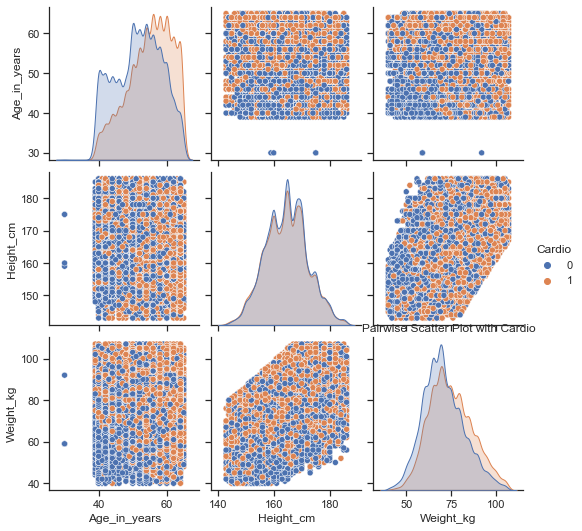

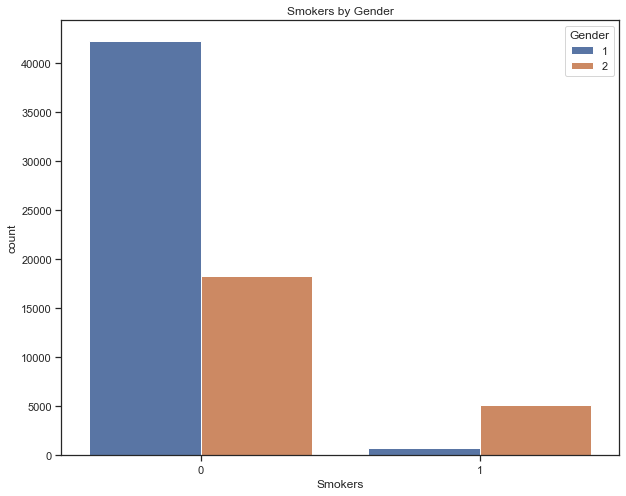

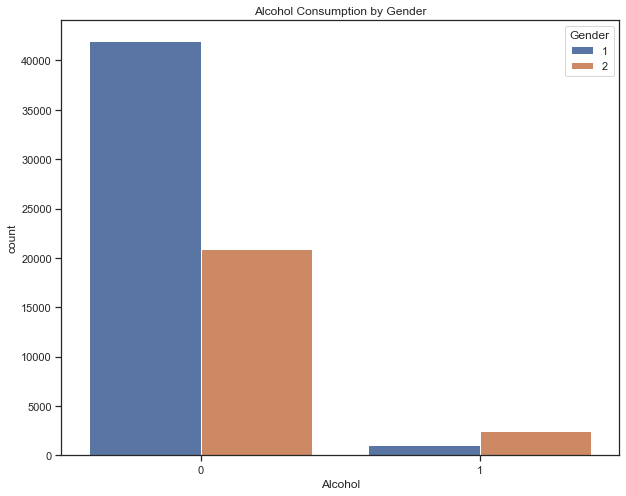

In [115]:
# Bar plot of combined risk category
plt.figure(figsize=(8, 6))
sns.countplot(x='Combined_risk_category', data=eda)
plt.title('Combined Risk Category Distribution')
plt.show()

# Grouped box plots
plt.figure(figsize=(10, 8))
sns.boxplot(x='Combined_risk_category', y='Age_in_years', hue='Gender', data=eda)
plt.title('Age Distribution by Combined Risk Category and Gender')
plt.show()


# Bar plot of pulse pressure
plt.figure(figsize=(8, 6))
sns.histplot(data=eda, x='pulse_pressure', kde=True)
plt.title('Distribution of Pulse Pressure')
plt.show()

# Distribution of variables with KDE and rug plot
sns.displot(data=eda, x='Age_in_years', hue='Cardio', kde=True, rug=True)
plt.title('Age Distribution with KDE and Rug Plot')
plt.show()

sns.displot(data=eda, x='Weight_kg', hue='Cardio', kde=True, rug=True)
plt.title('Weight Distribution with KDE and Rug Plot')
plt.show()

# Pairwise scatter plot with hue
sns.pairplot(data=eda, vars=['Age_in_years', 'Height_cm', 'Weight_kg'], hue='Cardio')
plt.title('Pairwise Scatter Plot with Cardio')
plt.show()

# Bar plot of smokers and alcohol consumption by gender
plt.figure(figsize=(10, 8))
sns.countplot(x='Smokers', hue='Gender', data=eda)
plt.title('Smokers by Gender')
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(x='Alcohol', hue='Gender', data=eda)
plt.title('Alcohol Consumption by Gender')
plt.show()



